# Plot Generation for Revisiting Pure State Transformations with Zero Communication

This Jupyter notebook generates Figures 4 and 5 of [Revisiting Pure State Transformations with Zero Communication](https://arxiv.org/abs/2301.04735).

In [1]:
# Here we import all the commands we will need
from math import comb,sqrt,floor,log
import matplotlib.pyplot as plt
import numpy as np

## Figure 4

In [59]:
# This calculates the ordered Bernoulli multicopy fidelity
def OrderedFidelity(n,p,epsilon):
    total = 0
    for k in range(0,n+1):
        total += comb(n,k)*(p**2 + (p*epsilon))**((n-k)/2)*((1-p)**2 - epsilon*(1-p))**(k/2)
    return total

#This calculates the unordered Bernoulli multicopy fidelity
def UnorderedFidelity(n,p,epsilon):
    return (sqrt(p*(p+epsilon))+sqrt((1-p)*(1-p-epsilon)))**(2*n)

In [60]:
# Generate Data
xaxis = [n for n in range(0,301,5)]
eps005p55Ordered = [OrderedFidelity(n,0.55,0.05) for n in xaxis] 
eps005p55Unordered = [UnorderedFidelity(n,0.55,0.05) for n in xaxis] 
eps01p55Ordered = [OrderedFidelity(n,0.55,0.1) for n in xaxis] 
eps01p55Unordered = [UnorderedFidelity(n,0.55,0.1) for n in xaxis] 
eps02p55Ordered = [OrderedFidelity(n,0.55,0.2) for n in xaxis] 
eps02p55Unordered = [UnorderedFidelity(n,0.55,0.2) for n in xaxis] 
eps04p55Ordered = [OrderedFidelity(n,0.55,0.4) for n in xaxis] 
eps04p55Unordered = [UnorderedFidelity(n,0.55,0.4) for n in xaxis]

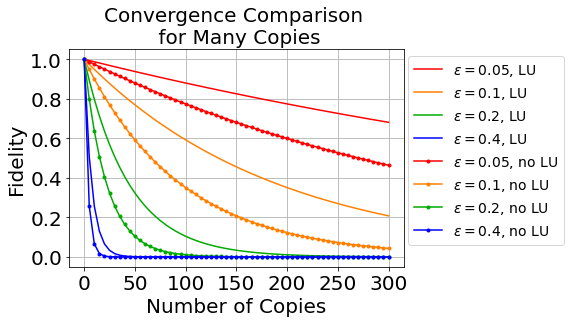

In [61]:
plt.plot(xaxis, eps005p55Ordered, label = r'$\varepsilon = 0.05$, LU',color=(1,0,0)) 
plt.plot(xaxis, eps01p55Ordered, label = r'$\varepsilon = 0.1$, LU',color=(1,0.5,0)) 
plt.plot(xaxis, eps02p55Ordered, label = r'$\varepsilon = 0.2$, LU',color=(0,2/3,0)) 
plt.plot(xaxis, eps04p55Ordered, label = r'$\varepsilon = 0.4$, LU',color=(0,0,1)) 
plt.plot(xaxis, eps005p55Unordered, label = r'$\varepsilon = 0.05$, no LU',color=(1,0,0),marker=".") #
plt.plot(xaxis, eps01p55Unordered, label = r'$\varepsilon = 0.1$, no LU',color=(1,0.5,0),marker=".") #
plt.plot(xaxis, eps02p55Unordered, label = r'$\varepsilon = 0.2$, no LU', color=(0,2/3,0),marker=".") #
plt.plot(xaxis, eps04p55Unordered, label = r'$\varepsilon = 0.4$, no LU', color=(0,0,1),marker=".") #
plt.grid(visible=True)
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right',fontsize=14)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.xlabel('Number of Copies', fontsize=20)
plt.ylabel('Fidelity', fontsize=20)
plt.title("Convergence Comparison \n for Many Copies", fontsize=20)
plt.savefig('Convergence_Comparison_Updated.png',bbox_inches='tight')
#Note that the bbox_extra_artists must be an iterable

## Figure 5

In [62]:
# Here we define all the data we use for the catalyst plot
xaxis = [n for n in range(1,9)]
p05q055 = [0.997493719,0.997493719,0.999140573,0.999354163,0.999472904,0.999520962,0.999605601,0.999612599]
p05q06 = [0.989897949,0.989897949,0.996602174,0.997418395,0.997866086,0.998172714,0.998358337,0.998503587]
p05q07 = [0.958257569,0.958257569,0.985619818,0.988697972,0.990330909,0.991295033,0.991884956,0.992352496]
p06q065 = [0.997332858,0.997332858,0.998944135,0.999248482,0.999308207,0.999348521,0.999393779,0.999415386]
p06q07 = [0.988998886,0.988998886,0.994421804,0.996740424,0.997105153,0.997379631,0.997538756,0.997718803]
p06q08 = [0.951918359,0.951918359,0.973106318,0.98386301,0.986182045,0.98804015,0.988869902,0.989471891]

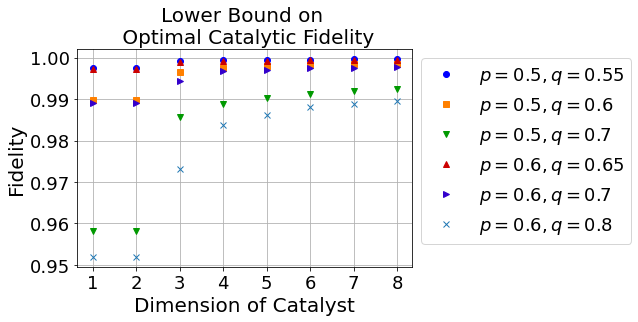

In [77]:
plt.plot(xaxis, p05q055, label = r'$p=0.5,q=0.55$',linestyle = 'none', marker = 'o',color=(0,0,1)) #
plt.plot(xaxis, p05q06, label = r'$p=0.5,q=0.6$',linestyle = 'none', marker = 's',color=(1,0.5,0))  #
plt.plot(xaxis, p05q07, label = r'$p=0.5,q=0.7$',linestyle = 'none', marker = 'v',color=(0,3/5,0)) #
plt.plot(xaxis, p06q065, label = r'$p=0.6,q=0.65$',linestyle = 'none', marker = '^',color=(4/5,0,0)) #
plt.plot(xaxis, p06q07, label = r'$p=0.6,q=0.7$',linestyle = 'none', marker = '>', color=(1/5,0,4/5)) 
plt.plot(xaxis, p06q08, label = r'$p=0.6,q=0.8$',linestyle = 'none', marker = 'x') 
plt.grid(visible=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=18)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.xlabel('Dimension of Catalyst', fontsize=20)
plt.ylabel('Fidelity', fontsize=20)
plt.title("Lower Bound on \n Optimal Catalytic Fidelity", fontsize=20)
plt.savefig('LowerBoundFidelity.png',bbox_inches='tight')

In [64]:
#Here we calculate the order of the dimension of the van Dam-Hayden embezzling state
#that would achieve the same lower bound on optimal catalytic fidelity
def FtoEmb(F):
    return floor(1/(1-F)*log(2,10))

xaxis = [n for n in range(1,9)]
p05q055F = [FtoEmb(i) for i in p05q055]
p05q06F = [FtoEmb(i) for i in p05q06]
p05q07F = [FtoEmb(i) for i in p05q07]
p06q065F = [FtoEmb(i) for i in p06q065]
p06q07F = [FtoEmb(i) for i in p06q07]
p06q08F = [FtoEmb(i) for i in p06q08]

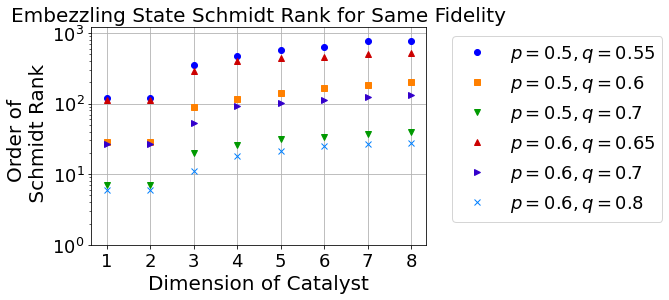

In [78]:
plt.yscale("log")
plt.ylim(1,1200)
plt.plot(xaxis, p05q055F, label = r'$p=0.5,q=0.55$',linestyle = 'none', marker = 'o',color=(0,0,1)) #
plt.plot(xaxis, p05q06F, label = r'$p=0.5,q=0.6$',linestyle = 'none', marker = 's',color=(1,0.5,0))  #
plt.plot(xaxis, p05q07F, label = r'$p=0.5,q=0.7$',linestyle = 'none', marker = 'v',color=(0,3/5,0)) #
plt.plot(xaxis, p06q065F, label = r'$p=0.6,q=0.65$',linestyle = 'none', marker = '^',color=(4/5,0,0)) #
plt.plot(xaxis, p06q07F, label = r'$p=0.6,q=0.7$',linestyle = 'none', marker = '>', color=(1/5,0,4/5)) 
plt.plot(xaxis, p06q08F, label = r'$p=0.6,q=0.8$',linestyle = 'none', marker = 'x', color=(0,0.5,1)) 
plt.grid(visible=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.xlabel('Dimension of Catalyst', fontsize=20)
plt.ylabel('Order of \n Schmidt Rank', fontsize=20)
plt.title("Embezzling State Schmidt Rank for Same Fidelity", fontsize=20)
plt.savefig('EmbezzlingStateOrder.png',bbox_inches='tight')